## Neural Network Model

In [16]:
import pandas as pd
import pandas as pd
import numpy as np
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_randfloat

# laod csv file
nfl = pd.read_csv("NFL_data_super_cleaned.csv")

### Data Preprocessing

In [17]:
# convert to an array
play = array(nfl["play_type"])

# encode as integers
play_encoder = LabelEncoder()
play_encoded =  play_encoder.fit_transform(play) 
 
# binary encode
play_onehot_encoder = OneHotEncoder(sparse=False) # disable sparse return type
# reshape the array
play_encoded = play_encoded.reshape(len(play_encoded), 1) 
play_onehot_encoded = play_onehot_encoder.fit_transform(play_encoded)

nfl["play_type"] = play_onehot_encoded.tolist()

posteam = array(nfl["posteam"])

# encode as integers
posteam_encoder = LabelEncoder()
posteam_encoded =  posteam_encoder.fit_transform(posteam) 
 
# binary encode
posteam_onehot_encoder = OneHotEncoder(sparse=False) # disable sparse return type
# reshape the array
posteam_encoded = posteam_encoded.reshape(len(posteam_encoded), 1) 
posteam_onehot_encoded = pd.DataFrame(posteam_onehot_encoder.fit_transform(posteam_encoded))

nfl

,posteam,yardline_100,quarter_seconds_remaining,qtr,down,goal_to_go,ydstogo,score_margin,play_type
0,PIT,58.0,893.0,1,1.0,0.0,10,0.0,"[0.0, 1.0, 0.0]"
1,PIT,53.0,856.0,1,2.0,0.0,5,0.0,"[0.0, 0.0, 1.0]"
2,PIT,56.0,815.0,1,3.0,0.0,8,0.0,"[0.0, 1.0, 0.0]"
3,PIT,56.0,807.0,1,4.0,0.0,8,0.0,"[1.0, 0.0, 0.0]"
4,TEN,98.0,796.0,1,1.0,0.0,10,0.0,"[0.0, 0.0, 1.0]"
...,...,...,...,...,...,...,...,...,...
352376,CAR,71.0,82.0,4,2.0,0.0,1,-5.0,"[0.0, 1.0, 0.0]"
352377,CAR,71.0,77.0,4,3.0,0.0,1,-5.0,"[0.0, 1.0, 0.0]"
352378,CAR,66.0,63.0,4,2.0,0.0,10,-5.0,"[0.0, 1.0, 0.0]"
352379,CAR,66.0,58.0,4,3.0,0.0,10,-5.0,"[0.0, 1.0, 0.0]"


In [18]:
from sklearn.preprocessing import MinMaxScaler
nfl1 = nfl.drop(columns = ['posteam'])
nfl2 = posteam_onehot_encoded.join(nfl1)
nfl2.columns = ['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DEN', 'DET', 
'GB', 'HOU', 'IND', 'JAX', 'KC', 'LAC', 'LAR', 'LV', 'MIA', 'MIN', 'NE', 'NO', 'NYG', 'NYJ', 
'PHI', 'PIT', 'SEA', 'SF', 'TB', 'TEN', 'WAS', 'yardline_100', 'quarter_seconds_remaining', 
'qtr', 'down', 'goal_to_go', 'ydstogo', 'score_margin', 'play_type']

nfl2


,ARI,ATL,BAL,BUF,CAR,CHI,CIN,CLE,DAL,DEN,...,TEN,WAS,yardline_100,quarter_seconds_remaining,qtr,down,goal_to_go,ydstogo,score_margin,play_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,58.0,893.0,1,1.0,0.0,10,0.0,"[0.0, 1.0, 0.0]"
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,53.0,856.0,1,2.0,0.0,5,0.0,"[0.0, 0.0, 1.0]"
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,56.0,815.0,1,3.0,0.0,8,0.0,"[0.0, 1.0, 0.0]"
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,56.0,807.0,1,4.0,0.0,8,0.0,"[1.0, 0.0, 0.0]"
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,98.0,796.0,1,1.0,0.0,10,0.0,"[0.0, 0.0, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352376,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,71.0,82.0,4,2.0,0.0,1,-5.0,"[0.0, 1.0, 0.0]"
352377,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,71.0,77.0,4,3.0,0.0,1,-5.0,"[0.0, 1.0, 0.0]"
352378,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,66.0,63.0,4,2.0,0.0,10,-5.0,"[0.0, 1.0, 0.0]"
352379,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,66.0,58.0,4,3.0,0.0,10,-5.0,"[0.0, 1.0, 0.0]"


In [19]:
nfl3 = nfl2.copy()
scaler = MinMaxScaler()
for column_name in ['yardline_100','quarter_seconds_remaining','qtr','down','goal_to_go','ydstogo','score_margin']:
    col = nfl3[column_name]
    scaled = scaler.fit_transform(nfl3[column_name].values.reshape(-1, 1))
    nfl3[column_name] = scaled
nfl3

,ARI,ATL,BAL,BUF,CAR,CHI,CIN,CLE,DAL,DEN,...,TEN,WAS,yardline_100,quarter_seconds_remaining,qtr,down,goal_to_go,ydstogo,score_margin,play_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.581633,0.992222,0.00,0.000000,0.0,0.183673,0.500000,"[0.0, 1.0, 0.0]"
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.530612,0.951111,0.00,0.333333,0.0,0.081633,0.500000,"[0.0, 0.0, 1.0]"
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.561224,0.905556,0.00,0.666667,0.0,0.142857,0.500000,"[0.0, 1.0, 0.0]"
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.561224,0.896667,0.00,1.000000,0.0,0.142857,0.500000,"[1.0, 0.0, 0.0]"
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.989796,0.884444,0.00,0.000000,0.0,0.183673,0.500000,"[0.0, 0.0, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352376,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.714286,0.091111,0.75,0.333333,0.0,0.000000,0.457627,"[0.0, 1.0, 0.0]"
352377,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.714286,0.085556,0.75,0.666667,0.0,0.000000,0.457627,"[0.0, 1.0, 0.0]"
352378,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.663265,0.070000,0.75,0.333333,0.0,0.183673,0.457627,"[0.0, 1.0, 0.0]"
352379,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.663265,0.064444,0.75,0.666667,0.0,0.183673,0.457627,"[0.0, 1.0, 0.0]"


### Training and Testing the Neural Network

In [20]:
X = nfl3.drop("play_type", axis = 1)
y = play_onehot_encoded

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

clf = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.3, batch_size = 100, hidden_layer_sizes = (40, 3), max_iter = 500)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test) 

In [21]:
prob = clf.predict_proba(X_test)
n = 0
for idx, x in enumerate(prob):
    for idx, y in enumerate(x):
        if y == max(x):
            x[idx] = 1
        else:
            x[idx] = 0
newy_pred = prob

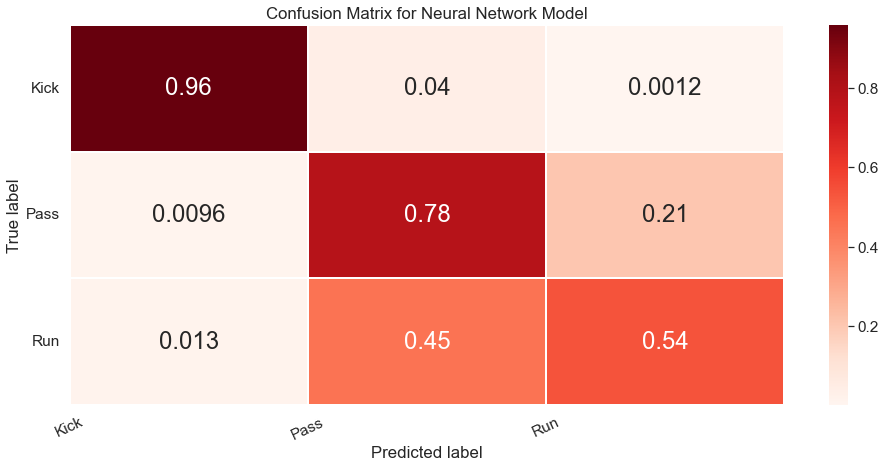

Accuracy: 0.6905133516842135
MSE: 0.19311936585411996
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3261
           1       0.71      0.77      0.74     18703
           2       0.64      0.57      0.60     13275

   micro avg       0.71      0.71      0.71     35239
   macro avg       0.76      0.76      0.76     35239
weighted avg       0.71      0.71      0.71     35239
 samples avg       0.71      0.71      0.71     35239



In [22]:
#Generate a confusion matrix
# print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

import matplotlib.pyplot as plt, seaborn as sb
from sklearn.metrics import confusion_matrix

#Make confusion matrix
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sb.set(font_scale=1.4)
sb.heatmap(matrix, annot=True, annot_kws={'size':24},
            cmap=plt.cm.Reds, linewidths=0.2)

# Add labels to the plot
class_names = ['Kick', 'Pass', 'Run']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Neural Network Model')

# save and display confusion matrix plot: 
plt.savefig("NN-con-matrix.png")
plt.show()

# print accuracy: 
print("Accuracy:", clf.score(X_test, y_test))

# print MSE: 
mse = mean_squared_error(y_test, newy_pred)
print('MSE:', mse)

# print classification report: 
print(classification_report(y_test, newy_pred))

## Hyperparameter Tuning

### K-Fold Cross Validation

In [10]:
from statistics import mean

acc_per_fold = []
loss_per_fold = []
fold_num = 1

kfold = KFold(n_splits=5)

for train, test in kfold.split(X, play_onehot_encoded):
    model = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.3, batch_size = 100, hidden_layer_sizes = (40, 3), max_iter = 500)
    hist = model.fit(X.iloc[train], play_onehot_encoded[train])
    score = model.score(X.iloc[test], play_onehot_encoded[test])
    y_pred = model.predict(X.iloc[test])
    prob = clf.predict_proba(X_test)
    n = 0
    for idx, x in enumerate(prob):
        for idx, y in enumerate(x):
            if y == max(x):
                x[idx] = 1
            else:
                x[idx] = 0
    newy_pred = prob
    mse = mean_squared_error(y_test, newy_pred)
    print(f'Fold {fold_num} - Accuracy: {score:.3f}; Loss: {mse:.3f}')
    acc_per_fold.append(score)
    loss_per_fold.append(mse)
    fold_num = fold_num + 1
   
print('Average Accuracy: %.3f' % (mean(acc_per_fold)))
print('Average Loss: %.3f' % (mean(loss_per_fold)))

Fold 1 - Accuracy: 0.698; Loss: 0.191
Fold 2 - Accuracy: 0.668; Loss: 0.191
Fold 3 - Accuracy: 0.671; Loss: 0.191
Fold 4 - Accuracy: 0.678; Loss: 0.191
Fold 5 - Accuracy: 0.693; Loss: 0.191
Average Accuracy: 0.681
Average Loss: 0.191


### Randomized Search CV

In [12]:
hypertuner = RandomizedSearchCV(estimator = clf, param_distributions = {
    'hidden_layer_sizes': (3,40),
    'learning_rate_init': sp_randfloat(0.1,0.3),
}, cv=5, return_train_score=False,n_jobs = 5)
hypertuner.fit(X, play_onehot_encoded)

RandomizedSearchCV(cv=5,
                   estimator=MLPClassifier(activation='logistic',
                                           batch_size=100,
                                           hidden_layer_sizes=(40, 3),
                                           learning_rate_init=0.3, max_iter=500,
                                           random_state=42, solver='sgd'),
                   n_jobs=5,
                   param_distributions={'hidden_layer_sizes': (3, 40),
                                        'learning_rate_init': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021F00AD5130>})

In [13]:
print('Best Score: %s' % hypertuner.best_score_)
print('Best Hyperparameters: %s' % hypertuner.best_params_)

Best Score: 0.6951907231056247
Best Hyperparameters: {'hidden_layer_sizes': 40, 'learning_rate_init': 0.15888987253733425}


In [14]:
bestModel = hypertuner.best_estimator_
print("Accuracy:", bestModel.score(X_test, y_test))

Accuracy: 0.7060926814041261
